In [7]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'
os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [8]:
from datasets import load_dataset

dataset = load_dataset(
    'cifar10',
    # split="train",
)

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [10]:
dataset['train'].features

{'img': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None)}

In [33]:
from sklearn.model_selection import train_test_split
import pickle

In [34]:
import pandas as pd
df_train = pd.DataFrame()
df_train['label'] = dataset['train']['label']
df_train.head()

,label
0,0
1,6
2,0
3,2
4,7


In [35]:
df_val = pd.DataFrame()
df_val['label'] = dataset['test']['label']
df_val.head()

,label
0,3
1,8
2,8
3,0
4,6


In [36]:
# df_val = df_val[(df_val['label']==1) | (df_val['label']==7)]
df_val['label'].value_counts()

label
3    1000
8    1000
0    1000
6    1000
1    1000
9    1000
5    1000
7    1000
4    1000
2    1000
Name: count, dtype: int64

In [37]:
df_val, _ = train_test_split(df_val, train_size=1000, random_state=42, stratify=df_val['label'])
df_val['label'].value_counts()

label
4    100
5    100
6    100
9    100
2    100
7    100
8    100
0    100
1    100
3    100
Name: count, dtype: int64

In [38]:
df_val.head()

,label
9128,4
5468,5
62,6
2465,9
2810,9


In [39]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 9128 to 1330
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [40]:
for i in [ 
    50000
]:
    for j in [0.5]:
        filename = os.path.join('./data/indices/{}-{}/idx-val.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_val.index.to_list(), handle)

In [41]:
# df_train = df_train[(df_train['label']==1) | (df_train['label']==7)]
df_train['label'].value_counts()

label
0    5000
6    5000
2    5000
7    5000
1    5000
4    5000
5    5000
3    5000
8    5000
9    5000
Name: count, dtype: int64

In [20]:
for i in [
    50000
         ]:
    for j in [0.5]:
        if i<len(df_train):
            df_train_, _ = train_test_split(df_train, train_size=i, 
                                        random_state=42, 
                                        stratify=df_train['label'])
        else:
            df_train_ = df_train.copy()
            
        print(len(df_train_))
        ####
        filename = os.path.join('./data/indices/{}-{}/idx-train.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_train_.index.to_list(), handle)
        ####
        count = 0
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-val/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1
        print(count)
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-test/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1 
        print(count)
        ####
        for k in range(1024):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                                  stratify=df_train_['label']
                             )
            filename = os.path.join('./data/indices/{}-{}/retrain/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1   
        print(count)

50000
256
512
1536


In [42]:
with open('./data/indices/50000-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

50000

In [43]:
with open('./data/indices/50000-0.5/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
len(idx_val)

1000

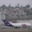

In [44]:
from datasets import DatasetDict, Dataset, load_dataset, Image

train_dataset = dataset['train'].select(idx_train)
train_dataset[0]["img"]

In [45]:
train_dataset

Dataset({
    features: ['img', 'label'],
    num_rows: 50000
})

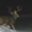

In [46]:
val_dataset =  dataset['test'].select(idx_val)
val_dataset[0]["img"]

In [47]:
val_dataset

Dataset({
    features: ['img', 'label'],
    num_rows: 1000
})

In [48]:
import pickle
with open("./data/indices/50000-0.5/lds-val/sub-idx-0.pkl", 'rb') as handle:
    sub_idx = pickle.load(handle)
print(sub_idx[0:5])

[10936, 11178, 26489, 22034, 14307]


In [49]:
print(len(sub_idx))

25000


In [50]:
import pickle
with open("./data/indices/50000-0.5/lds-val/sub-idx-8.pkl", 'rb') as handle:
    sub_idx = pickle.load(handle)
print(sub_idx[0:5])

[6591, 35601, 1087, 17631, 28857]


In [51]:
print(len(sub_idx))

25000


In [52]:
import pickle
with open("./data/indices/50000-0.5/idx-val.pkl", 'rb') as handle:
    sub_idx = pickle.load(handle)
print(sub_idx[0:5])

[9128, 5468, 62, 2465, 2810]


In [53]:
print(len(sub_idx))

1000
